# Primera parte: Introducción a las redes neuronales con Keras

En esta primera parte, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


* ¿ Por qué usamos Keras?.

Es una de las herramientas para implementar redes neuronales más populares pues es una libreria de alto nivel de Python que porporciona de una manera sencilla la creación de muchos modelos de Deep Learning usando como backend otras librerias como TensorFlow. De esta forma permite crear redes de una forma modular considerando el modelo como una secuencia y sin necesidad de defirnir arquitecturas de bajo nivel.

Importamos otras librerias que nos van a hacer falta

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.dtype

dtype('uint8')

Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
len(x_train)

60000

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
len(x_test)

10000

* El temaño que tiene el conjunto de imagenes de train es de 60.000 imágenes.
* En el conjunto de test contiene 10.000 imágenes. 
* El tamaño de todas las imágenes es 28 largo x 28 ancho lo que hace un total de 784 pixeles. 

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

 Observamos que las variables con la etiquetas en train (y_train) tienen el mismo numero de imagenes (x_train). Es simplemente para verificar que cuadran las dimensiones. Lo mismo ocurre en el caso  del test , x_test con y_test.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [12]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


* Vemos los 60.000 imagenes pertenecientes al conjunto x_train con todos sus valores de los 28 pixeles que sus valores están entre 0 y 1.

In [13]:
x_train[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* Analizamos el primer elemento del conjunto x_test y queremos observar su 28 valores.

In [14]:
x_train[0].shape

(28, 28)

* Las dimensiones de una observación, es decir, las dimensiones de una imagen

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Los valores de van de cero a uno, pues hemos hecha esa transformación, ya que es necesaria para trabajar con los modelos que vamos a aplicar mas adelante. Cuanto el valor este mas cerca de cero mas negro será y cuanto mas aproximado a uno sea, mas blanco será el pixel.

In [16]:
y_train 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Los valores que tiene la variable y_train ,en realidad representa a la clase que pertenece la inagen, es decir las etiquetas para clasificar y van del 0 al 9 y corresponden a los siguientes articulos:
  * 0 =	T-shirt/top
  * 1 = Trouser
  * 2 = Pullover
  * 3 = Dress
  * 4 = Coat
  * 5 = Sandal
  * 6 = Shirt
  * 7 = Sneaker
  * 8 = Bag
  * 9 = Ankle Boot


In [17]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [18]:
len(y_train)

60000

In [19]:
len(y_test)

10000

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [20]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

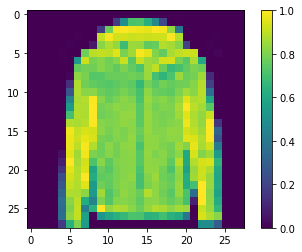

In [21]:
visualize_example(x_train[5000])

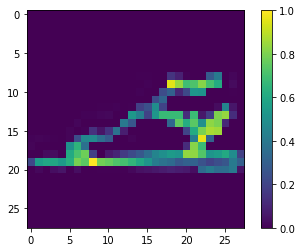

In [22]:
visualize_example(x_train[300])

* Queremos ver con mas detalles algunas imágenes más. Para ver que son.

In [23]:
nombre_objetos = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

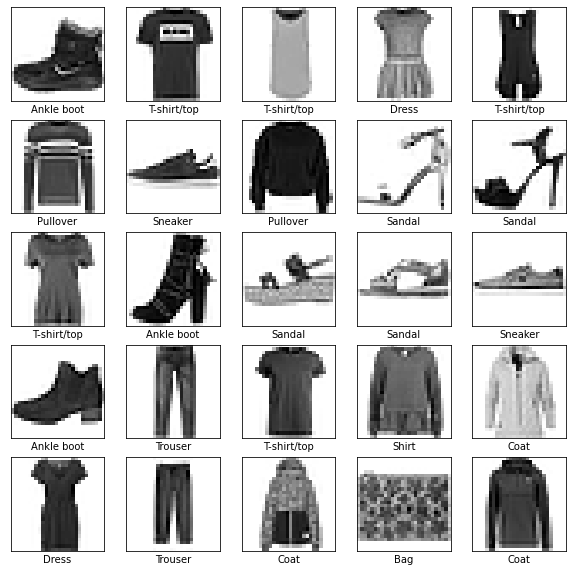

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(nombre_objetos[y_train[i]])
plt.show()

* Es otra forma de ver mas imagenes del dataset, en este ejemplo accedemos a las 50 primeras y le indicamos a que grupo de imagen perntenece.

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(3.5 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [27]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])


# Creción del modelo


* Keras dispone de dos estilos de API: Secuencial y Funcional. Elegimos la primera porque es un estilo mas sencillo y directo.
* La primera capa del modelo ' keras.layers.Flatten(input_shape=(28, 28))', lo que esta haciendo es transformar el formato original de las imagenes bidimensional, a un formato unidimensional para que podamos trabajar con ellas.
* Las otras capas 'Dense', ocultas, estan totalmente conectadas unas con otras. La primera capa tiene 128 neuronas, la segunda contiene 64 nodos o neuronas, y la tercera y última tiene 10 nodos, por que son los tipos de o clases de objetos a etiquetar.
* Cada capa necesita una función de activación para poder realizar el Backpropagation, en las dos priemeras usamos la sigmoid y en la ultima utilizaremos la activacion softmax, que es la mas usada en estos casos de clasificación donde solo una etiqueta es la vlida y son mutuamente excluyentes, es decir, una imagen no puede peretener a dos clases de objetos

In [28]:

model_1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Compilación del modelo

* "loss", mide el resultado del modelo en referencia a su exactitud (accuracy) durante el entrenamiento del mismo. La idea es minimizar esta función de pérdida.Esta función de coste debe ser diferenciable pues vamos a usar el algoritmo de *gradient descent* 
* "Optimizer", es cómo el modelo se actualiza basado en el conjunto de test, en nuestro caso, en la segunda parte de la actividad, se basa en el conjunto de validación de los datos con la función de pérdida descrita arriba.
* "Metrics", se usan para cuantificar la bondad del modelo. Vamos a usar Accuracy. Es el cociente entre el número de predicciones correctas y número de predicciones totales. Es el más usado para problemas de clasificación. También se le conoce con el nombre de Exactitud.

In [29]:
model_1.fit(x_train, y_train, epochs=20, batch_size= 64)

Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 2.2162 - accuracy: 0.3680
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 1.8718 - accuracy: 0.5610
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 1.4678 - accuracy: 0.5900
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 1.2125 - accuracy: 0.6320
Epoch 5/20
60000/60000 [==============================] - 5s 85us/step - loss: 1.0585 - accuracy: 0.6666 
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.9553 - accuracy: 0.6921
Epoch 7/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.8799 - accuracy: 0.7096
Epoch 8/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.8218 - accuracy: 0.7235
Epoch 9/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.7757 - accuracy: 0.7337
Epoch 10/20
60000/60000 [=============================

# Entrenamiento del modelo

* Con los datos de entrenamiento, y sus etiquetas asocidas, es decir con x_train e y_train entrenamos el modelo. 
* El modelo aprende a asociar imagenes con etiquetas.
* Le indicamos que no coja todo el dataset de entrenamiento, sino que coja lotes de 64 imagenes (batch_size), para reducir la capacidad de memoria, pero que no se repita ninguna imagen en bachs distintos y la elección es de las mismas es al azar.
* Otro parametro es el número de vueltas completas que le daremos al conjunto de datos, epochs, que en nuestro caso es 20. Cada vuelta los bach son distintos.

In [30]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


* Resumen del primer modelo, es del tipo secuencial,en el cual nos indica el numero de parametros totales buscar (109.386), el número de neuronas por capa 784, 128, 64, 10 respectivamente y el número de parametros a calcular por capas 1004.480, 8256 y 650 respectivamente. Teniendo en cuenta que en la primera capa de entrada no hay que calcular parametros.

In [31]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model_2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(x_train, y_train, epochs=20, batch_size= 64, shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.8943 - accuracy: 0.7089
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.5584 - accuracy: 0.8088
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.4995 - accuracy: 0.8279
Epoch 4/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.4689 - accuracy: 0.8371
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.4486 - accuracy: 0.8428
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.4310 - accuracy: 0.8497
Epoch 7/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.4184 - accuracy: 0.8541
Epoch 8/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.4073 - accuracy: 0.8570
Epoch 9/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.3988 - accuracy: 0.8609
Epoch 10/20
60000/60000 [==============================

In [32]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


He realizado dos modelos de red neuronal, usando las exigencias para el ejercicio, pero tan solo cambiando dos parametros, la función de activacion de las dos primeras capas. En el primer caso usando la funcion sigmoid y en el segundo caso usando la función de activación relu. Ademas he considera introducir a la hora entrenar la opción de barajar (shuflle) los datos de entrenamiento, para que la compenente de azar de mayor. Con esto simples cambios veremos a continuacón la mejora a la hora de calcular una medida de exactitud como el accuracy. 

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(0.5 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [33]:
test_loss, test_acc = model_1.evaluate(x_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/step

Test accuracy: 0.7879999876022339


In [34]:
test_loss, test_acc = model_2.evaluate(x_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 57us/step

Test accuracy: 0.8615000247955322


Existe una mejora a la hora de clasificar las imagenes utilazando el segundo modelo, pues pasamos de un accuracy del 0.78 a 0.86. 

**Pregunta 3.2 *(0.5 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [35]:
predictions_1 = model_1.predict(x_test)

In [36]:
predictions_1[100]

array([4.0618017e-02, 1.4110273e-01, 2.0571619e-03, 7.9621267e-01,
       5.2399305e-03, 2.5710824e-03, 9.6986210e-03, 2.0843281e-03,
       2.4455428e-04, 1.7084350e-04], dtype=float32)

* He pedido, por ejemplo, que me diga la prediccion del modelo para la imagen numero 100, que nos devuelve un array de numeros enteros. Cada numero quiere decir la probabilidad que asigna el modelo a pertenecer a cada clase. El primer valor del array a la derecha corresponde al valor 0 de la etiqueta, el segundo valor corresponde al valor 1 de la etiqueta, y asi sucesivamente. Por ejemplo, el modelo le da una probabilidad de 3.9497469e-02 para pertenecer a la clase 0, que es la calse 'T-shirt/top'. 

In [37]:
np.argmax(predictions_1[100])

3

* Para saber que etiqueta le corresponde de todas ellas, cogemos la que tiene mayor probabilidad, en este caso es la que corresponde a la numero 3.

In [38]:
y_test[100]

3

* Verificamos que clasifica bien, pues si observamos el valor real de esa etiqueta nos devuelve el mismo número.

In [39]:
predictions_2 = model_2.predict(x_test)

In [40]:
predictions_2[200]

array([1.27338397e-04, 9.99291420e-01, 2.54960105e-05, 4.72145039e-04,
       8.00012640e-05, 5.84428790e-07, 2.63363791e-06, 3.12302468e-08,
       3.32913970e-07, 1.11935154e-08], dtype=float32)

In [41]:
np.argmax(predictions_2[200])

1

In [42]:
y_test[200]

1

* Realizamos los mismos pasos para el segundo modelo, observamos que tambien clasifica correctamente el ejemplo elegido al azar.